### **Support Vector Machine (SVM) for Diabetes Prediction**

### Problem Statement

* Let's develop a classification model to predict whether a patient will develop diabetes. 

* We will use the Support Vector Machine (SVM) algorithm, a powerful classifier suitable for this task.

* The dataset for this practice is the Pima Indians Diabetes Database, a real-world dataset from the UCI Machine Learning Repository.

* Our goal is to train an SVM model, compare the performance of different kernels, and tune its hyperparameters to achieve the best possible accuracy. 

* We'll implement the solution, from data loading to model evaluation.

### Step 1: Import Necessary Libraries

* We'll start by importing the essential libraries. `pandas` is for data manipulation, and the modules from `sklearn` will be used for modeling and evaluation.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


### Step 2: Load and Explore the Dataset

* This dataset is not part of scikit-learn's built-in loaders, so we'll load it directly from a public URL. 

* The dataset contains several features related to health metrics and a binary outcome variable (0 for no diabetes, 1 for diabetes).

In [51]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']

df = pd.read_csv(url, names=names)

# Display the first 5 rows of the dataset
df.head()


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
print("\nNumber of positive (1) and negative (0) outcomes:")
df['outcome'].value_counts()


Number of positive (1) and negative (0) outcomes:


outcome
0    500
1    268
Name: count, dtype: int64

In [53]:
# Display the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Step 3: Split the Data

* We'll split the data into a training set and a testing set. 

* The `outcome` column is our target variable (`y`), and the other columns are our features (`X`). 

* We'll use a standard 80/20 split.

In [54]:
X = df.drop('outcome', axis='columns')
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Train and Evaluate Models with Different Kernels

* We will train two separate SVM models to compare the performance of different kernels. 

* The `linear` kernel is a good baseline, while the `rbf` (Radial Basis Function) kernel is a powerful choice for non-linear data.

In [55]:
# Model 1: Linear Kernel
linear_model = SVC(kernel='linear')

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
print(f'Linear Kernel Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}')

Linear Kernel Accuracy: 0.75


In [56]:
print('\nLinear Model Classification Report:\n')
print(classification_report(y_test, y_pred_linear))


Linear Model Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [57]:
# Model 2: RBF Kernel
rbf_model = SVC(kernel='rbf')

# Train the model
rbf_model.fit(X_train, y_train)

# Make predictions
y_pred_rbf = rbf_model.predict(X_test)

# Evaluate the model
print(f'\nRBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}')


RBF Kernel Accuracy: 0.77


In [58]:
print('\nRBF Model Classification Report:\n')
print(classification_report(y_test, y_pred_rbf))


RBF Model Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



### Step 5: Hyperparameter Tuning

* The RBF kernel's performance can be further optimized by tuning its hyperparameters, `C` and `gamma`. 

* Experiment with different values to find the best possible accuracy on the test set. 

* Remember, a high `C` or `gamma` can sometimes lead to overfitting.

In [59]:
# Tune the parameters of the RBF model

# Try setting a different C value and a different gamma value
tuned_model = SVC(kernel='rbf', C=10, gamma='scale')

# Train the tuned model
tuned_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_tuned = tuned_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f'Tuned Model Accuracy: {accuracy_tuned:.2f}')

Tuned Model Accuracy: 0.77


In [60]:
# Display the confusion matrix for the tuned model
print('\nTuned Model Confusion Matrix:')
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_tuned


Tuned Model Confusion Matrix:


array([[83, 16],
       [20, 35]])

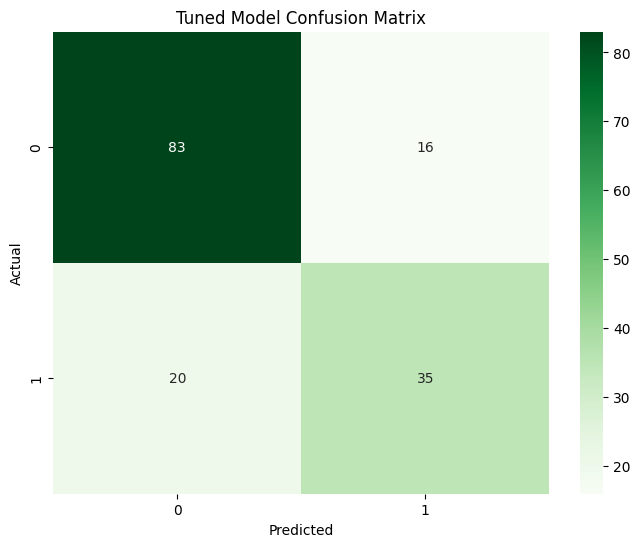

In [61]:
# Visualize the confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Model Confusion Matrix')
plt.show()

In [62]:
# Tuned Model Classification Report
print('\nTuned Model Classification Report:\n')
print(classification_report(y_test, y_pred_tuned))


Tuned Model Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



### Summary

* In this notebook, we've successfully applied the SVM algorithm to the diabetes prediction problem. 

* We performed crucial steps like data loading from an external source, training models with different kernels, and evaluating their performance. 

* We likely observed that SVM can be a very effective tool for this type of binary classification problem, and that tuning hyperparameters is key to achieving optimal results.

---